In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, RidgeCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

## 2 - Carregando e explorando os dados

### 2.1 - Carregando os dados

In [3]:
df = pd.read_csv('dados_iot.csv')

### 2.2 - Explorando os dados

In [4]:
df.sort_values('ID', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,1,467.90,65.59,486.10,41.06,23.27,92.39
1,2,387.14,70.23,501.81,25.93,18.77,85.17
2,3,339.75,74.72,535.88,30.50,19.41,80.76
3,4,390.19,63.83,422.76,24.18,17.41,63.55
4,5,454.11,70.64,619.85,16.50,20.31,83.19


In [5]:
print(f'O conjunto de dados é formados por {df.shape[0]} observações e {df.shape[1]} atributos')

O conjunto de dados é formados por 3200 observações e 7 atributos


In [6]:
df.describe()

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,1600.500000,439.163412,67.086106,501.620666,29.840194,20.042578,80.156616
std,923.904757,89.915142,4.776214,42.951183,6.158710,1.648479,6.755854
min,1.000000,145.480000,51.860000,352.820000,8.060000,14.760000,55.370000
25%,800.750000,377.060000,63.770000,471.427500,25.550000,18.920000,75.657500
50%,1600.500000,437.375000,66.935000,502.350000,29.885000,20.050000,80.220000
75%,2400.250000,500.792500,70.330000,530.142500,33.932500,21.180000,84.660000
max,3200.000000,775.140000,83.900000,672.380000,53.780000,26.290000,108.900000


In [7]:
df.drop('ID', axis=1).corr()[['RYTHM']]

,RYTHM
ILLUM,0.044763
HUMID,-0.023406
CO2,0.275289
SOUND,0.167734
TEMP,0.249845
RYTHM,1.000000


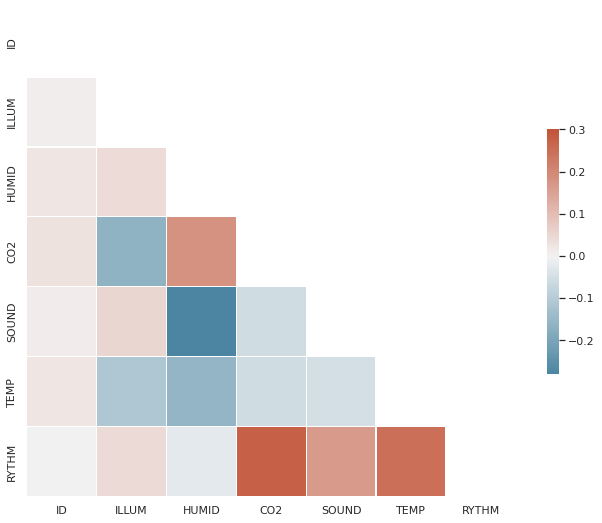

In [8]:
sns.set_theme(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 3 - Modelos de ML

In [9]:
X = df.drop(['RYTHM', 'ID'], axis=1)
y = df[['RYTHM']].copy()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2400, 5)
(800, 5)


### 3.1 - Modelo dummy - mean

In [68]:
reg_dummy_mean = DummyRegressor(strategy='mean')
reg_dummy_mean.fit(X_train, y_train)

score_dummy_mean = reg_dummy_mean.score(X_test, y_test)
y_pred = reg_dummy_mean.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R2: {score_dummy_mean}')
print(f'RMSE: {rmse}')

R2: -0.0001346957244361402
RMSE: 6.873075257117443


### 3.2 - Modelo dummy - median

In [69]:
reg_dummy_median = DummyRegressor(strategy='median')
reg_dummy_median.fit(X_train, y_train)

score_dummy_median = reg_dummy_median.score(X_test, y_test)
y_pred = reg_dummy_median.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R2: {score_dummy_mean}')
print(f'RMSE: {rmse}')

R2: -0.0001346957244361402
RMSE: 6.872663266521939


### 3.3 - Modelo de regressão

In [161]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.06314979, -0.3299235 , -1.1881677 , -1.83079116, -0.1888967 ],
       [ 0.70836505,  0.4152969 , -0.27106045, -1.52346561, -1.08640447],
       [-0.81307961, -1.2661196 , -1.19786628,  0.02623983,  0.46886585],
       ...,
       [-0.07728605,  0.1516674 ,  0.33758463, -0.08982461,  0.46886585],
       [-0.07006686,  0.72874615, -0.61405903, -0.57860301,  0.07543778],
       [ 1.26785241,  0.29489918, -0.14781751,  0.25509928, -0.25036983]])

In [71]:
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [72]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

score_reg_model1 = reg.score(X_test_scaled, y_test)
y_pred = reg.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R2: {score_reg_model1}')
print(f'RMSE: {rmse}')

R2: 0.23308355953387228
RMSE: 6.018605482061035


In [73]:
reg = LinearRegression()
reg.fit(X_train, y_train)

score_reg_model2 = reg.score(X_test, y_test)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R2: {score_reg_model2}')
print(f'RMSE: {rmse}')

R2: 0.2330835595338724
RMSE: 6.018605482061035


In [74]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train_scaled)

score_reg_model3 = reg.score(X_test_scaled, y_test_scaled)
y_pred = reg.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, scaler.inverse_transform(y_pred)))
print(f'R2: {score_reg_model3}')
print(f'RMSE: {rmse}')

R2: 0.2330835595338724
RMSE: 6.018605482061035


### 3.4 - Modelo Ridge

In [75]:
reg = Ridge()
reg.fit(X_train_scaled, y_train)

score_reg_modelo_ridge = reg.score(X_test_scaled, y_test)
y_pred = reg.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R2: {score_reg_modelo_ridge}')
print(f'RMSE: {rmse}')

R2: 0.2330603992045187
RMSE: 6.01869636017075


### 3.5 - Modelo ElasticNet

In [76]:
reg = ElasticNet()
reg.fit(X_train_scaled, y_train)

score_reg_model_elasticNet = reg.score(X_test_scaled, y_test)
y_pred = reg.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R2: {score_reg_model_elasticNet}')
print(f'RMSE: {rmse}')

R2: 0.13980170895574318
RMSE: 6.374133280251526


### 3.6 - Modelo de árvore

In [77]:
regTree = DecisionTreeRegressor()
regTree.fit(X_train, y_train)

score_reg_tree = regTree.score(X_test, y_test)
y_pred = regTree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R2: {score_reg_tree}')
print(f'RMSE: {rmse}')

R2: -0.6240477416493477
RMSE: 8.758328864572283


### 3.7 Modelos ensemble

In [78]:
def avaliando_modelos(modelo):
  reg = modelo()
  reg.fit(X_train_scaled, y_train.values.ravel())

  score_reg = reg.score(X_test_scaled, y_test)
  y_pred = reg.predict(X_test_scaled)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print(f'R2: {score_reg}')
  print(f'RMSE: {rmse}')

In [79]:
avaliando_modelos(AdaBoostRegressor)

R2: 0.16957260416316433
RMSE: 6.26285975354531


In [80]:
avaliando_modelos(BaggingRegressor)

R2: 0.07954399971121706
RMSE: 6.593611718170854


In [81]:
avaliando_modelos(ExtraTreesRegressor)

R2: 0.16278223111413392
RMSE: 6.288413204812682


In [82]:
avaliando_modelos(GradientBoostingRegressor)

R2: 0.20416944111017177
RMSE: 6.131011887350179


In [83]:
avaliando_modelos(RandomForestRegressor)

R2: 0.17966070712530846
RMSE: 6.224702637759093


## 4 - Tunando os hyper parametros dos melhores modelos
* Ridge
* GradientBoostingRegressor

In [102]:
reg_ridge_cv = RidgeCV(cv=5)
reg_ridge_cv.fit(X_train_scaled, y_train)

score_reg_ridge_cv = reg_ridge_cv.score(X_test_scaled, y_test)
y_pred = reg_ridge_cv.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R2: {score_reg_ridge_cv}')
print(f'RMSE: {rmse}')

R2: 0.2330603992045187
RMSE: 6.01869636017075


In [144]:
param_grid = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 
              'learning_rate': np.linspace(0.001, 0.5, 200),
              'criterion': ['friedman_mse', 'squared_error'],
              'min_samples_split': np.linspace(0.0001, 0.03, 200),
              'min_samples_leaf': np.linspace(0.0001, 0.05, 200),
              'max_depth': range(1, 10),
              'max_features': ['auto', 'sqrt', 'log2']}

In [150]:
reg = GradientBoostingRegressor()

search = RandomizedSearchCV(reg, param_grid, n_iter=30, cv=5)
search.fit(X_train, y_train.values.ravel())

melhor_modelo = search.best_estimator_

score = melhor_modelo.score(X_test, y_test)
y_pred = melhor_modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R2: {score_reg_model2}')
print(f'RMSE: {rmse}')

R2: 0.2330835595338724
RMSE: 6.085569535791791


In [178]:
df_pred = pd.DataFrame(y_test.values, columns=['y_true'])
df_pred['y_pred'] = y_pred.round(2)
df_pred.tail(10)

,y_true,y_pred
790,83.08,80.50
791,82.34,76.31
792,76.65,81.69
793,88.42,83.21
794,95.14,85.58
795,78.45,81.31
796,89.98,81.68
797,80.32,84.42
798,67.07,80.92
799,81.47,84.73


## 5 - Prevendos os valores do dataset answer.csv

In [154]:
answers = pd.read_csv('answers.csv')
answers.head()

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,0.0
1,1,342.96,63.19,488.85,37.36,20.41,0.0
2,2,369.86,57.39,516.86,26.45,20.89,0.0
3,3,304.65,67.80,517.50,32.98,22.52,0.0
4,4,442.25,68.21,500.91,37.28,21.88,0.0


In [164]:
def preparando_dados(dados):
  dados = dados[['ILLUM', 'ILLUM', 'HUMID', 'CO2', 'SOUND']].copy()
  return dados 

In [167]:
X_new_scaled = preparando_dados(answers)
X_new_scaled.head()

,ILLUM,ILLUM,HUMID,CO2,SOUND
0,337.90,337.90,63.29,518.13,22.38
1,342.96,342.96,63.19,488.85,37.36
2,369.86,369.86,57.39,516.86,26.45
3,304.65,304.65,67.80,517.50,32.98
4,442.25,442.25,68.21,500.91,37.28


In [177]:
y_pred_answers = melhor_modelo.predict(X_new_scaled).round(2)
answers_predicted = answers.copy()
answers_predicted['RYTHM'] = y_pred_answers
answers_predicted.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- TEMP

  warnings.warn(message, FutureWarning)


,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,77.22
1,1,342.96,63.19,488.85,37.36,20.41,81.11
2,2,369.86,57.39,516.86,26.45,20.89,81.50
3,3,304.65,67.80,517.50,32.98,22.52,80.51
4,4,442.25,68.21,500.91,37.28,21.88,81.82


In [180]:
answers_predicted.to_csv('answers_predicted.csv', index=False)